### Notebook structure
It is best to think about your final project as a data-driven report. You will need to put everything into a Jupyter notebook with the following structure:

* Introduction: Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.
* The Metric: Describe your metric, and what features are you measuring. What datasets are you using?
* The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.
* Conclusion: Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.
When your group presents your findings to your lab section (see below), the presentation will cover all of the above categories.

In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("trees.csv",low_memory=False)

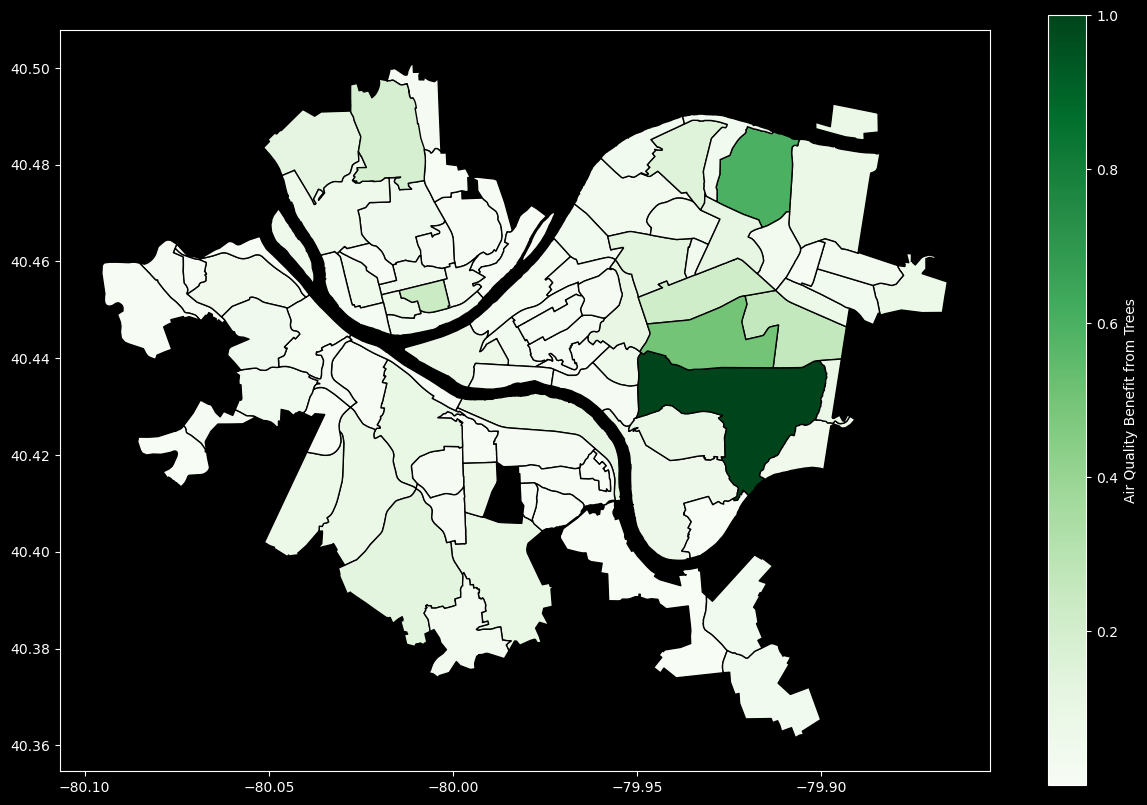

neighborhood
Squirrel Hill South    1.000000
Highland Park          0.601408
Squirrel Hill North    0.501760
Point Breeze           0.260821
Allegheny Center       0.231023
Shadyside              0.213212
Perry North            0.184205
Stanton Heights        0.152074
Brookline              0.129954
Bloomfield             0.129840
Name: air_quality_benfits_total_lbs, dtype: float64

In [10]:
trees_benefit = data.groupby("neighborhood").sum()['air_quality_benfits_total_lbs'] # extract the necessary data
trees_benefit_max = max(data.groupby("neighborhood").sum()['air_quality_benfits_total_lbs'])
trees_benefit = trees_benefit/trees_benefit_max
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
trees_map = neighborhoods.merge(trees_benefit, how='left', left_on='hood', right_on='neighborhood') # make the map
trees_map.plot(column='air_quality_benfits_total_lbs', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="Black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Air Quality Benefit from Trees"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.style.use('dark_background')
plt.show()
trees_benefit.sort_values(ascending=False).head(10)